# The numpy.random package

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

## What is numpy.random?

### "Simple random data" functions

#### integers

In [3]:
rng.integers(5, size = 20)

array([4, 4, 0, 3, 1, 1, 4, 4, 2, 4, 2, 3, 3, 2, 2, 4, 4, 1, 1, 3],
      dtype=int64)

#### random

In [4]:
rng.random(size = 20)

array([0.91943284, 0.85286891, 0.66738967, 0.88203117, 0.76894469,
       0.00544587, 0.34313315, 0.45301027, 0.01527109, 0.9869636 ,
       0.15589133, 0.48112743, 0.78777714, 0.81489473, 0.79065677,
       0.01964047, 0.37758109, 0.47729335, 0.76147863, 0.2209561 ])

#### choice

In [5]:
rng.choice(10, 3)

array([2, 2, 8], dtype=int64)

In [6]:
colours = ["red", "blue", "green", "black", "yellow"]

In [7]:
rng.choice(colours)

'red'

#### bytes

In [8]:
rng.bytes(5)

b'\xb95\x06\x9ep'

### "Permutations" functions

In [9]:
# Explain In-place vs. copy differences between below functions

#### shuffle

In [10]:
digits = np.arange(10)

In [11]:
digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
rng.shuffle(digits)

In [13]:
digits

array([9, 0, 6, 5, 8, 3, 4, 1, 2, 7])

In [14]:
three_by_three = np.arange(9).reshape(3, 3)

In [15]:
three_by_three

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [16]:
# Using shuffle on an array will rearrange the position of rows
# but will leave the items from each row in the original order

In [17]:
rng.shuffle(three_by_three)

In [18]:
three_by_three

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

#### permutation

In [19]:
rng.permutation(10)

array([2, 0, 6, 1, 5, 7, 3, 4, 8, 9])

#### permuted

In [20]:
# Unlike Shuffle, Permuted will rearrange the order of items
# Within each row. Permuted also requires a new variable.
# If we reuse the same array we used Shuffle
# on earlier, we can see the difference bewtween Shuffle and 
# Permuted

In [21]:
permuted_three_by_three = rng.permuted(three_by_three, axis=1)

In [22]:
permuted_three_by_three

array([[8, 6, 7],
       [4, 5, 3],
       [0, 2, 1]])

In [23]:
# The original array can be passed in as an argument if we want it to 
# match the output of the permuted array

In [24]:
permuted_three_by_three = rng.permuted(three_by_three, axis=1, out=three_by_three)

In [25]:
three_by_three

array([[6, 8, 7],
       [5, 3, 4],
       [1, 0, 2]])

In [26]:
permuted_three_by_three

array([[6, 8, 7],
       [5, 3, 4],
       [1, 0, 2]])

In [27]:
three_by_three is permuted_three_by_three

True

## Distributions

#### binomial

In [28]:
# A binomial distribution tracks trials and records a binary success/failure 
# outcome of trials. 

In [29]:
# n is the number of trials 
n = 20

# p = probability of success, which must be between 0 and 1. 
# For example, a fair coin has a 50/50 change of being either heads of tails
# Therefore to simulate a fair coin, p = 0.5
p = 0.5

In [30]:
# The third argument is the number of tests. 
# That means in this example, a coin is flipped 20 times
# And there is 1000 instances of this
coin_flip = rng.binomial(n, p, 100)

In [31]:
# We can take the resulting array as giving us the number of heads
# After every 20 coin flips
coin_flip

array([ 9,  8,  8, 13, 11, 12, 10, 12, 12, 14,  9, 14,  8,  9,  8,  9, 11,
        9,  9, 10, 14, 10, 12, 10, 13,  9, 12, 10, 11,  7,  8,  8, 11, 10,
       12,  9,  7, 10, 10,  9, 11, 10,  9,  8,  8, 11, 10,  6,  8, 10, 10,
        5,  9, 15, 13, 11,  7, 10,  9, 11, 11, 14, 11,  8, 15,  9,  8,  9,
        9,  6,  9,  9,  9,  7,  5,  7, 10, 11, 11,  9,  8, 11, 11, 14, 11,
       11,  9, 14,  9,  8, 13, 13, 11,  5, 11,  9,  9, 10, 14,  9],
      dtype=int64)

(array([ 3.,  2.,  5., 13., 24., 15., 18.,  6.,  5.,  9.]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15.]),
 <BarContainer object of 10 artists>)

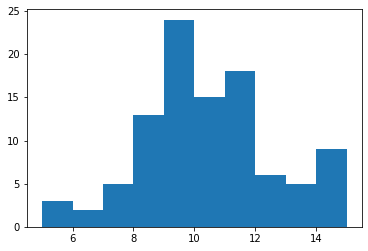

In [32]:
# Plotting the randomly generated data
plt.hist(coin_flip)

#### normal

In [164]:
# IQ test is designed such that the mean result is 100 
# and the standard deviation is 15

# Mean
mu = 100

#Standard Deviation
sigma = 15

In [165]:
iq = np.random.default_rng().normal(mu, sigma, 100000)

In [166]:
iq

array([118.75303495,  98.94140792,  86.72156718, ...,  91.45633148,
       111.60971122, 128.10672881])

## NB need to redo this as round doesnt work as I'd hoped as the rounding seems to bias the outcome slightly

In [170]:
# As resulting array results were up to 8 decimal places, round is used to
# convert to whole numbers as IQ results are whole numbers
rounded_iq = np.around(iq)

In [171]:
rounded_iq

array([119.,  99.,  87., ...,  91., 112., 128.])

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 6.000e+00, 9.000e+00,
        1.200e+01, 2.000e+01, 5.200e+01, 5.700e+01, 7.000e+01, 1.200e+02,
        2.900e+02, 2.670e+02, 3.750e+02, 5.060e+02, 1.123e+03, 1.021e+03,
        1.299e+03, 1.641e+03, 2.950e+03, 2.498e+03, 2.999e+03, 3.329e+03,
        5.837e+03, 4.330e+03, 4.729e+03, 4.898e+03, 7.781e+03, 5.347e+03,
        5.255e+03, 5.184e+03, 7.210e+03, 4.510e+03, 4.137e+03, 3.785e+03,
        4.880e+03, 2.661e+03, 2.264e+03, 1.940e+03, 2.173e+03, 1.121e+03,
        8.950e+02, 6.590e+02, 6.800e+02, 3.240e+02, 2.490e+02, 1.620e+02,
        1.580e+02, 6.200e+01, 3.800e+01, 3.400e+01, 2.500e+01, 1.000e+01,
        6.000e+00, 5.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 33.  ,  35.25,  37.5 ,  39.75,  42.  ,  44.25,  46.5 ,  48.75,
         51.  ,  53.25,  55.5 ,  57.75,  60.  ,  62.25,  64.5 ,  66.75,
         69.  ,  71.25,  73.5 ,  75.75,  78.  ,  80.25,  82.5 ,  84.75,
         87.  ,  89.25,  91.5 ,  93.75,  9

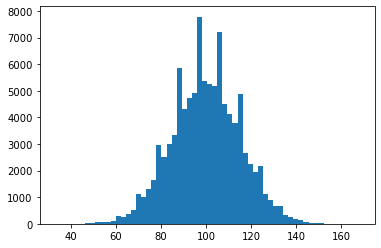

In [172]:
# Plotting the randomly generated IQ results
plt.hist(rounded_iq, bins = 60)

#### uniform

In [126]:
dice = np.random.default_rng().uniform(1,20,1000000)

In [127]:
print(dice)

[13.56369855 13.55537947  8.37811345 ... 12.81667135 13.31228147
 16.80391382]


In [128]:
rounded_dice = np.round(dice, decimals=0)

In [129]:
rounded_dice

array([14., 14.,  8., ..., 13., 13., 17.])

(array([26404., 52427., 52805., 52367., 52753., 52491., 52718., 52285.,
        52483., 52874., 52440., 52166., 52873., 53044., 52363., 52685.,
        53099., 52541., 52809., 26373.]),
 array([ 1.  ,  1.95,  2.9 ,  3.85,  4.8 ,  5.75,  6.7 ,  7.65,  8.6 ,
         9.55, 10.5 , 11.45, 12.4 , 13.35, 14.3 , 15.25, 16.2 , 17.15,
        18.1 , 19.05, 20.  ]),
 <BarContainer object of 20 artists>)

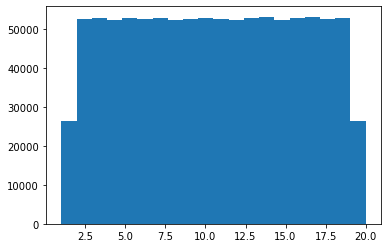

In [131]:
plt.hist(rounded_dice, bins = 20)

#### poisson

#### exponential

## Seeds

## References